In [ ]:
import numpy as np
import time
import math as m
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
import jax
import jax.numpy as jnp

---

**Questions**

1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against `numpy.median` routine in terms of time?

4. What is the gradient of the following function with respect to x and y?
   \[
   x^2 y + y^3 \sin(x)
   \]

5. Use `JAX` to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y.

6. Use `sympy` to confirm that you obtain the same gradient analytically.

7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:
   1. 2022
      1. Branch 1
         1. Roll Number: 1, Name: N, Marks:
            1. Maths: 100, English: 70 ...
      2. Branch 2
   2. 2023
      1. Branch 1
      2. Branch 2
   3. 2024
      1. Branch 1
      2. Branch 2
   4. 2025
      1. Branch 1
      2. Branch 2

8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.
   1. \( y = x \)
   2. \( y = x^2 \)
   3. \( y = \frac{x^3}{100} \)
   4. \( y = \sin(x) \)
   5. \( y = \frac{\sin(x)}{x} \)
   6. \( y = \log(x) \)
   7. \( y = e^x \)

10. Using numpy generate a matrix of size 20x5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as "a", "b", "c", "d", "e". Find the column with the highest standard deviation. Find the row with the lowest mean.

11. Add a new column to the dataframe called "f" which is the sum of the columns "a", "b", "c", "d", "e". Create another column called "g". The value in the column "g" should be "LT8" if the value in the column "f" is less than 8 and "GT8" otherwise. Find the number of rows in the dataframe where the value in the column "g" is "LT8". Find the standard deviation of the column "f" for the rows where the value in the column "g" is "LT8" and "GT8" respectively.

12. Write a small piece of code to explain broadcasting in numpy.

13. Write a function to compute the `argmin` of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the `np.argmin` function to verify your solution.

---


In [ ]:
# Question 1
# How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

"""
for each element in the new matrix that is n x m element we do k multiplication so total n x m x k  multiplication

we also add that k multipled number so to add k number we do addition k-1 time so total n x m x (k-1) addition

"""



In [ ]:
# Question 2
# Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy.
# Compare the timing of both solutions. Which one is faster? Why?
n=int(input("interger n  "))
k0=int(input("interger k  "))
m=int(input("interger m  "))

m1 = np.random.randint(0, 10, (n, k0))
m2 = np.random.randint(0, 10, (k0, m))

mat = np.zeros((n,m))
t1=time.time()
for i in range (n):
  for j in range(m):
    for k in range (k0):
      mat[i][j]+=m1[i][k]*m2[k][j]

t2=time.time()
m0 = m1 @ m2

t3=time.time()

print(mat,"\n the time for munal is ",t2-t1)

print(m0,"\n the time for numpy is ",t3-t2)

"""numpy is faster because it is written in C/C++"""

interger n  4
interger k  5
interger m  3
[[112. 117.  89.]
 [ 59. 125.  70.]
 [ 82. 115.  82.]
 [ 42.  78.  51.]] 
 the time for munal is  0.00039386749267578125
[[112 117  89]
 [ 59 125  70]
 [ 82 115  82]
 [ 42  78  51]] 
 the time for numpy is  0.00011444091796875


In [ ]:
# Question 3
# Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the array.
# Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method?
# Can you implement both these methods in Python and compare against numpy.median routine in terms of time?
""" i will select kth smallest number where k is n/2 """
def partition(a, start, end):
    pivot = a[end]
    pIndex = start
    for i in range(start, end):
        if a[i] <= pivot:
            a[i], a[pIndex] = a[pIndex], a[i]
            pIndex += 1
    a[pIndex], a[end] = a[end], a[pIndex]
    return pIndex


def QuickSelect(a,start,end,k):
    if end<= start:
        return a[start]
    index=partition(a,start,end)
    if index== k:
        return a[start]
    elif index > k:
        return QuickSelect(a,start,index-1,k)
    else:
        return QuickSelect(a,index+1,end,k-(index-start+1))

n=int(input(" enter n: "))

l =  np.random.randint(0,10,n)

t1=time.time()


if n&1==1:
  k=n//2+1
  ans=QuickSelect(l,0,n-1,k)
else:
  k1=n/2
  k2=n/2 + 1
  ans1=QuickSelect(l,0,n-1,k1)
  ans2=QuickSelect(l,0,n-1,k2)
  ans=(ans1+ans2)/2
  print(ans1,ans2)


t2=time.time()

ans0=np.median(l)

t3=time.time()

print(l)
print(ans," the time for manual is ",t2-t1)

print(ans0," the time for numpy is ",t3-t2)






 enter n: 15
[3 1 0 0 3 0 1 0 5 7 7 9 9 6 9]
3  the time for manual is  0.0003292560577392578
3.0  the time for numpy is  0.00188446044921875


In [ ]:
# Question 4
# What is the gradient of the following function with respect to x and y?
# x^2 y + y^3 sin(x)

"""
fx= 2*x*y + y^3*np.cos(x)
fy= x^2 + 3*y^2*np.sin(x)

"""

In [ ]:
# Question 5
# Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y.

def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

# Compute the gradient
grad_f = jax.grad(f, argnums=(0, 1))

x, y = 1.0, 1.0
print("JAX - Gradient at (x, y) = (1.0, 1.0):", grad_f(x, y))
x, y = 2.0, 2.0
print("JAX - Gradient at (x, y) = (2.0, 2.0):", grad_f(x, y))
x, y = 1.0, 2.0
print("JAX - Gradient at (x, y) = (1.0, 2.0):", grad_f(x, y))
x, y = 2.0, 1.0
print("JAX - Gradient at (x, y) = (2.0, 1.0):", grad_f(x, y))

JAX - Gradient at (x, y) = (1.0, 1.0): (Array(2.5403023, dtype=float32, weak_type=True), Array(3.5244129, dtype=float32, weak_type=True))
JAX - Gradient at (x, y) = (2.0, 2.0): (Array(4.670825, dtype=float32, weak_type=True), Array(14.911569, dtype=float32, weak_type=True))
JAX - Gradient at (x, y) = (1.0, 2.0): (Array(8.322418, dtype=float32, weak_type=True), Array(11.0976515, dtype=float32, weak_type=True))
JAX - Gradient at (x, y) = (2.0, 1.0): (Array(3.5838532, dtype=float32, weak_type=True), Array(6.727892, dtype=float32, weak_type=True))


In [ ]:
# Question 6
# Use sympy to confirm that you obtain the same gradient analytically.

x, y = sp.symbols('x y')

f = x**2 * y + y**3 * sp.sin(x)

grad_f = [sp.diff(f, var) for var in (x, y)]

print("slope with respect to x",grad_f[0])
print("slope with respect to y",grad_f[1])

slope with respect to x 2*x*y + y**3*cos(x)
slope with respect to y x**2 + 3*y**2*sin(x)


In [ ]:
# Question 7
# Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.
# Something like:
# 1. 2022
#    1. Branch 1
#       1. Roll Number: 1, Name: N, Marks:
#          1. Maths: 100, English: 70 ...
#    2. Branch 2
# 2. 2023
#    1. Branch 1
#    2. Branch 2
# 3. 2024
#    1. Branch 1
#    2. Branch 2
# 4. 2025
#    1. Branch 1
#    2. Branch 2

dic={2023:{"Cse":{"roll_number":23110237,"name": "parthiv","marks":{ "Maths": 100, "English": 70}}}}

print(dic[2023]["Cse"]["marks"]["Maths"])

100


In [ ]:
# Question 8
# Store the same information using Python classes. We have an overall database which is a list of year objects.
# Each year contains a list of branches. Each branch contains a list of students. Each student has some properties
# like name, roll number and has marks in some subjects.

class Year:
  def __init__(self,year) -> None:
    self.year=year
    self.branch=dict({})

  def add_branch(self,branch,student):
    self.branch[branch]=student


class Student:
  def __init__(self,rolln,name,marks):
    self.roll_number=rolln
    self.name=name
    self.marks=marks

class Marks:
  def __init__(self,sub,mark):
    self.Dict_marks={sub:mark}

  def add_marks(self,sub,mark):
    self.Dict_marks[sub]=mark

y23=Year(23)
marks=Marks("ML",9)
student1=Student(23110237,"Parthiv Patel",marks)
y23.add_branch('AI',student1)





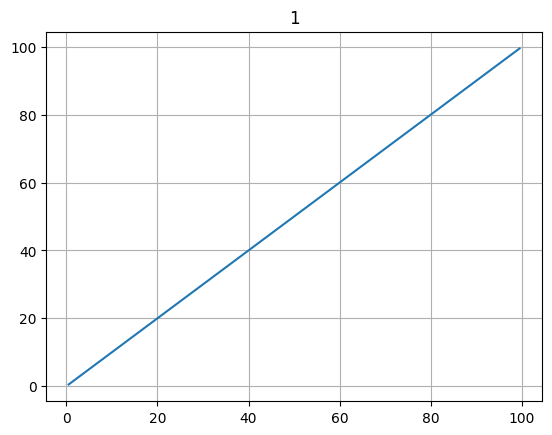

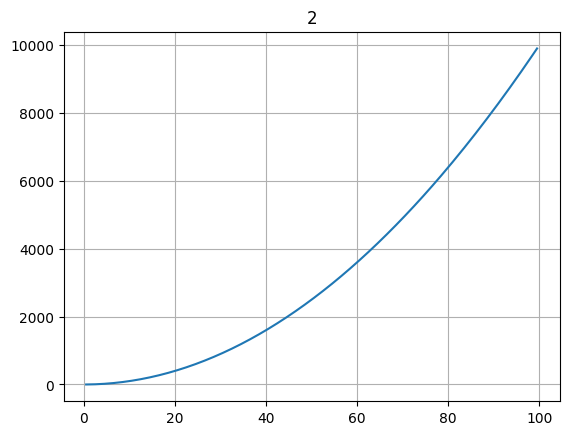

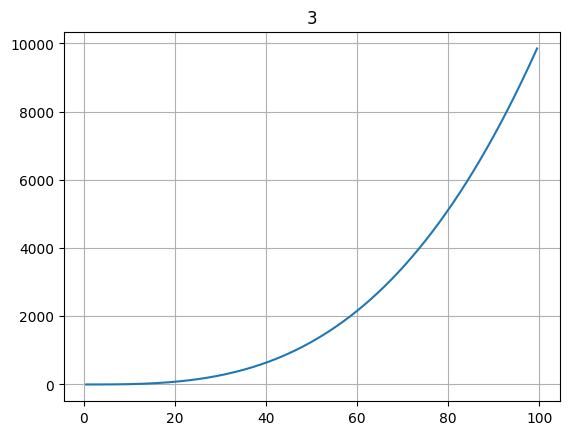

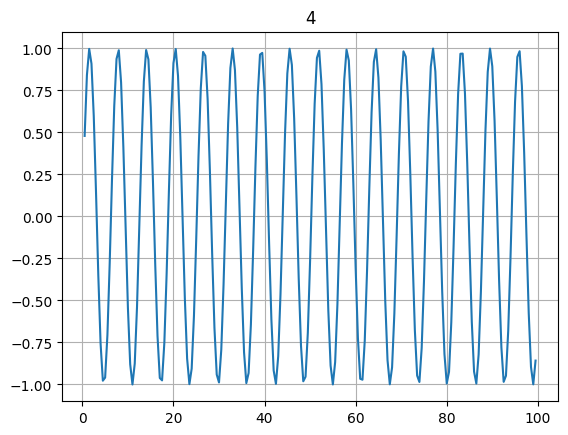

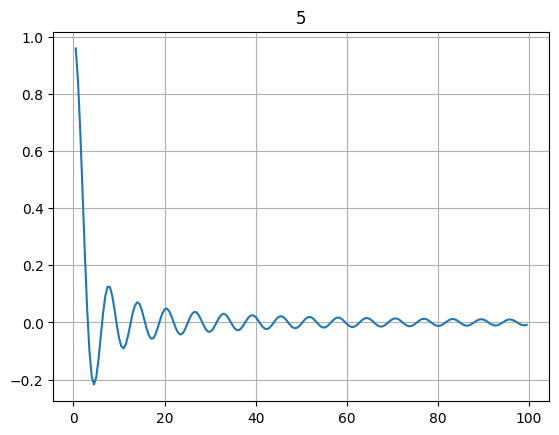

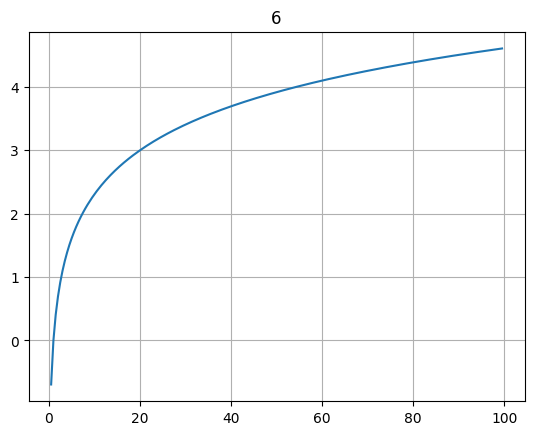

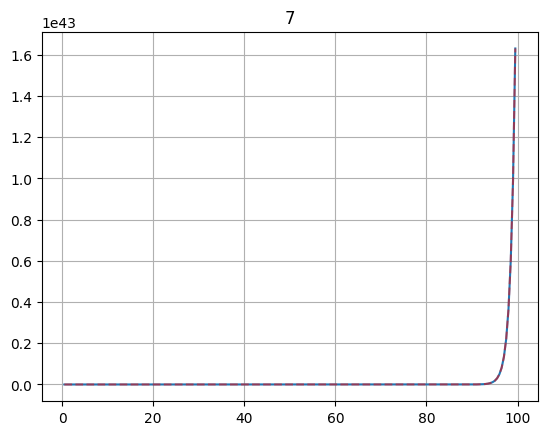

In [ ]:
# Question 9
# Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.
# 1. y = x
# 2. y = x^2
# 3. y = x^3 / 100
# 4. y = sin(x)
# 5. y = sin(x) / x
# 6. y = log(x)
# 7. y = e^x

x=np.arange(0.5,100,0.5)
y=x

plt.plot(x,y)
plt.title("1")
plt.grid(True)
plt.show()

y=x*x
plt.plot(x,y)
plt.title("2")
plt.grid(True)
plt.show()

y=x**3/100
plt.plot(x,y)
plt.title("3")
plt.grid(True)
plt.show()

y=np.sin(x)
plt.plot(x,y)
plt.title("4")
plt.grid(True)
plt.show()

y=np.sin(x)/x
plt.plot(x,y)
plt.title("5")
plt.grid(True)
plt.show()

y=np.log(x)
plt.plot(x,y)
plt.title("6")
plt.grid(True)
plt.show()

y=m.e**x
plt.plot(x,y)
plt.title("7")
plt.grid(True)

y=np.exp(x)
plt.plot(x,y,"r--",alpha=0.5)
plt.grid(True)
plt.show()

In [ ]:
# Question 10
# Using numpy generate a matrix of size 20x5 containing random numbers drawn uniformly from the range of 1 to 2.
# Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as "a", "b", "c", "d", "e".
# Find the column with the highest standard deviation. Find the row with the lowest mean.


m=np.random.randint(1,3,(20,5))
col=["a", "b", "c", "d", "e"]
df = pd.DataFrame(m, columns=col)
print(df.head(20))

max_sd=-1
min_mean=3
for char in (col):
  if min_mean > df[char].mean():
    min_mean = df[char].mean()
  if max_sd < df[char].std():
    max_sd = df[char].std()

print("mean",min_mean)
print("standard deviation",max_sd)



    a  b  c  d  e
0   2  1  1  1  2
1   1  1  2  1  2
2   2  2  1  1  2
3   1  2  2  2  2
4   1  1  2  2  2
5   2  1  1  1  1
6   2  1  2  2  1
7   1  1  2  2  2
8   2  2  1  2  1
9   2  1  1  2  2
10  1  1  2  2  2
11  1  1  2  2  2
12  2  2  2  1  1
13  2  2  2  2  1
14  1  1  2  1  1
15  2  2  2  1  2
16  2  1  1  1  1
17  2  2  1  2  2
18  2  2  2  2  1
19  2  1  2  1  1
mean 1.4
standard deviation 0.5104177855340405


In [ ]:
# Question 11
# Add a new column to the dataframe called "f" which is the sum of the columns "a", "b", "c", "d", "e".
# Create another column called "g". The value in the column "g" should be "LT8" if the value in the column "f" is less than 8
# and "GT8" otherwise. Find the number of rows in the dataframe where the value in the column "g" is "LT8".
# Find the standard deviation of the column "f" for the rows where the value in the column "g" is "LT8" and "GT8" respectively.

df["f"]=df["a"]+df["b"]+df["c"]+df["d"]+df["e"]

df['g'] = df['f'].apply(lambda x: "LT8" if x < 8 else "GT8")

std_lt8 = df[df['g'] == "LT8"]['f'].std()
std_gt8 = df[df['g'] == "GT8"]['f'].std()

print(df.head(20))
print(std_lt8)
print(std_gt8)


    a  b  c  d  e  f    g
0   2  1  1  1  2  7  LT8
1   1  1  2  1  2  7  LT8
2   2  2  1  1  2  8  GT8
3   1  2  2  2  2  9  GT8
4   1  1  2  2  2  8  GT8
5   2  1  1  1  1  6  LT8
6   2  1  2  2  1  8  GT8
7   1  1  2  2  2  8  GT8
8   2  2  1  2  1  8  GT8
9   2  1  1  2  2  8  GT8
10  1  1  2  2  2  8  GT8
11  1  1  2  2  2  8  GT8
12  2  2  2  1  1  8  GT8
13  2  2  2  2  1  9  GT8
14  1  1  2  1  1  6  LT8
15  2  2  2  1  2  9  GT8
16  2  1  1  1  1  6  LT8
17  2  2  1  2  2  9  GT8
18  2  2  2  2  1  9  GT8
19  2  1  2  1  1  7  LT8
0.5477225575051661
0.4972451580988469


In [ ]:
# Question 12
# Write a small piece of code to explain broadcasting in numpy.

m1=np.array([1,2,3])

m2=np.array([[20],
             [40],
            [60]])

print(m1+m2)


[[21 22 23]
 [41 42 43]
 [61 62 63]]


In [ ]:
# Question 13
# Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element.
# You can use the np.argmin function to verify your solution.
def min_index(arr):
  n=arr.ndim()
  arr=arr.flatten()
  l=[]
  for i in range(n):
    min_value=None
    min_index=None
    for j in range(len(arr)/n):
      if min_value is None or min_value > arr[j + i*n]:
        min_value = arr[j + i*n]
        min_index = j
    l.append(min_index)
  return l
